In [9]:
import nltk
nltk.download('nps_chat')
nltk.download('webtext')
from nltk.book import *

[nltk_data] Downloading package nps_chat to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to /Users/macbook/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Exercises

---

## Task 1. `Using FreqDist, find the following from text3`

### • words that are hapaxes (unique) and those that occur less than 5 times

In [17]:
from nltk import FreqDist

In [19]:
fdist = FreqDist(text3)

In [21]:
hapaxes = fdist.hapaxes() #унікальні слова

In [22]:
less_than_5 = [word for word, freq in fdist.items() if freq < 5] # слова < 5 разів

In [28]:
print("список унікальних слів:", '\n\n', hapaxes)

список унікальних слів: 

 ['form', 'void', 'Day', 'Night', 'firmame', 'Heaven', 'appe', 'Earth', 'signs', 'seasons', 'lesser', 'nig', 'darkne', 'fly', 'whales', 'winged', 'seas', 'likene', 'subdue', 'finished', 'sanctified', 'plant', 'gr', 'mist', 'breathed', 'parted', 'Pison', 'bdellium', 'onyx', 'Gihon', 'Ethiopia', 'Hiddekel', 'Assyria', 'Euphrates', 'freely', 'eatest', 'sle', 'ribs', 'rib', 'Woman', 'Man', 'cleave', 'ashamed', 'subtil', 'gard', 'knowing', 'desired', 'sewed', 'fig', 'leaves', 'aprons', 'walking', 'cool', 'whereof', 'gavest', 'belly', 'enmity', 'conception', 'Thorns', 'thistles', 'sweat', 'tak', 'coats', 'clothed', 'Cherubims', 'flaming', 'tiller', 'firstlings', 'fallen', 'crieth', 'tillest', 'henceforth', 'punishment', 'driven', 'findeth', 'whosoever', 'slayeth', 'vengeance', 'mark', 'finding', 'Nod', 'Methusa', 'Methusael', 'Jabal', 'Jubal', 'handle', 'organ', 'instructor', 'artificer', 'brass', 'ir', 'Naamah', 'spee', 'wounding', 'avenged', 'En', 'book', 'Male', 

In [29]:
print("список слів, що зустрічаються < 5 разів:", '\n\n', less_than_5)

список слів, що зустрічаються < 5 разів: 

 ['form', 'void', 'darkness', 'Spirit', 'moved', 'Day', 'Night', 'firmame', 'Heaven', 'dry', 'appe', 'Earth', 'gathering', 'Se', 'grass', 'itself', 'lights', 'signs', 'seasons', 'lesser', 'nig', 'darkne', 'fourth', 'abundantly', 'moving', 'fly', 'open', 'whales', 'moveth', 'winged', 'Be', 'fill', 'seas', 'likene', 'dominion', 'fish', 'replenish', 'subdue', 'bearing', 'green', 'sixth', 'heavens', 'finished', 'host', 'seventh', 'ended', 'work', 'rested', 'sanctified', 'plant', 'gr', 'caused', 'rain', 'mist', 'formed', 'breathed', 'nostrils', 'breath', 'planted', 'eastward', 'grow', 'pleasant', 'knowledge', 'parted', 'heads', 'Pison', 'compasseth', 'Havilah', 'bdellium', 'onyx', 'Gihon', 'Ethiopia', 'Hiddekel', 'goeth', 'Assyria', 'Euphrates', 'dress', 'freely', 'e', 'eatest', 'alone', 'help', 'fall', 'sle', 'ribs', 'closed', 'instead', 'rib', 'bone', 'bones', 'fle', 'Woman', 'Man', 'cleave', 'naked', 'ashamed', 'subtil', 'Yea', 'trees', 'gard', 

---

### • draw a plot showing mapping from word length to word frequency

In [30]:
import matplotlib.pyplot as plt

In [31]:
word_length_freq = {} # словник, {довжина слова: список частот}
for word, freq in fdist.items():
    length = len(word)
    if length not in word_length_freq:
        word_length_freq[length] = []
    word_length_freq[length].append(freq)

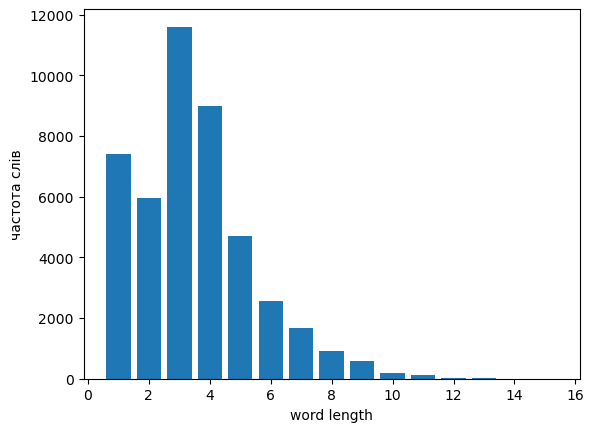

In [37]:
plt.bar(word_length_freq.keys(), [sum(freq_list) for freq_list in word_length_freq.values()])
plt.xlabel('word length')
plt.ylabel('частота слів')
plt.show()

---

### • find 10 most frequent words occurring at the end of the sentence

In [71]:
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import defaultdict

In [74]:
sentences = sent_tokenize(" ".join(text3)) # речення

end_words_freq = defaultdict(int)

def clean_word(word): # без знаків та інших небуквених елементів
    return ''.join(char for char in word if char.isalnum())

for sentence in sentences:
    words = word_tokenize(sentence)
    if len(words) > 1:
        second_last_word = clean_word(words[-2])
        end_words_freq[second_last_word.lower()] += 1

most_common_end_words = sorted(end_words_freq.items(), key=lambda x: x[1], reverse=True)[:10]

print("10 most frequent words occurring at the end of the sentence:", '\n\n', most_common_end_words)

10 most frequent words occurring at the end of the sentence: 

 [('him', 58), ('me', 38), ('thee', 33), ('earth', 31), ('them', 25), ('son', 25), ('wife', 20), ('it', 19), ('lord', 18), ('egypt', 18)]


---

## Task 2. `Create custom NLTK text of your favourite (public domain) book via`

In [93]:
raw = ' '.join(text3)
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)

---

### • Concordance

In [94]:
text.concordance("word") # як використовується це слово у контексті

Displaying 7 of 7 matches:
eir portion . After these things the word of the LORD came unto Abram in a vis
se is mine heir . And , behold , the word of the LORD came unto him , saying ,
I would it might be according to thy word . And he removed that day the he goa
 well with the flocks ; and bring me word again . So he sent him out of the va
er my house , and according unto thy word shall all my people be rul only in t
 money . And he did according to the word that Joseph had spoken . As soon as 
 thy servant , I pray thee , speak a word in my lord ' s ears , and let not th


---

### • Similar

In [95]:
text.similar("word") # слова, які використовуються у схожих контекстах

lord name wife hand servants plain face day firmament land seed days
cattle man field sight stone east father mother


---

### • Dispersion Plot 

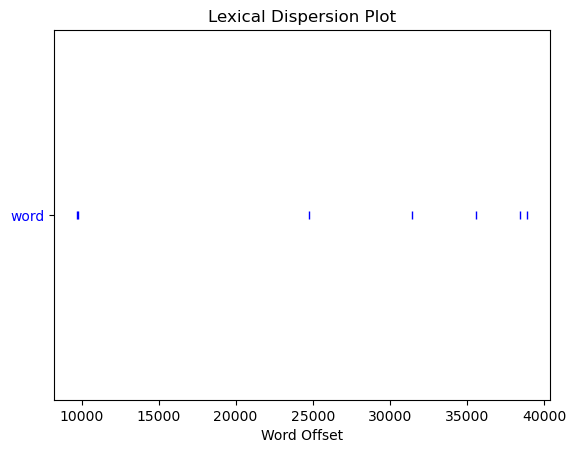

In [96]:
text.dispersion_plot(["word"]) # позиції кожного входження слова у тексті, що дозволяє оцінити його розподіл

---

### • FreqDist

In [99]:
print(FreqDist(text).most_common(10)) # частоту вживання кожного слова у тексті

[(',', 3682), ('and', 2428), ('the', 2411), ('of', 1358), ('.', 1316), ('And', 1250), ('his', 651), ('he', 648), ('to', 611), (';', 606)]


---

## Task 3. `Write a program that will`

In [100]:
import re

In [101]:
def extract_monetary_amounts(text): # вилучення грошових сум з тексту
    amounts = re.findall(r'\$[0-9]+(?:\.[0-9]+)?', text)
    return [float(amount[1:]) for amount in amounts]

In [102]:
def sum_monetary_amounts(amounts): # сумування грошових сум
    return sum(amounts)

---

In [103]:
text_ = "qwe erf $123.45, jwnef ekenf $400."

In [107]:
amounts = extract_monetary_amounts(text_)
extract_monetary_amounts(text_)

[123.45, 400.0]

In [108]:
sum_monetary_amounts(amounts)

523.45

---

## Task 4.

In [110]:
import json

In [111]:
def clean_nodes(nodes): # вилучення записів з "Nodes", які починаються з "8."
    return [node for node in nodes if not node.startswith("8.")]

In [112]:
def transform_server(server): #замінF формату запису "ServerName.ServerType" на {"name": "ServerName", "type": "ServerType"}
    name, server_type = server.split(".")
    return '{{"name": "{}", "type": "{}"}}'.format(name, server_type)

In [113]:
json_data = '''
{
    "HTTPHost": "example.com",
    "HTTPPort": 8080,
    "Config": {
        "Enabled": true,
        "Server": "wakuv2.prod",
        "Nodes": ["8.210.222.231", "168.166.125.145", "8.45.67.89"]
    }
}
'''

In [114]:
data = json.loads(json_data)

In [115]:
data["Config"]["Nodes"] = clean_nodes(data["Config"]["Nodes"])

In [116]:
data["Config"]["Server"] = transform_server(data["Config"]["Server"])

In [117]:
print(json.dumps(data, indent=4))

{
    "HTTPHost": "example.com",
    "HTTPPort": 8080,
    "Config": {
        "Enabled": true,
        "Server": "{\"name\": \"wakuv2\", \"type\": \"prod\"}",
        "Nodes": [
            "168.166.125.145"
        ]
    }
}
